# 1 - INTRODUCTION

**Nama  : Enggar Kristian** 

**Batch : FTDS - 012** 

**Dataset   :**

**Objective :** Buatlah model machine learning Unsupervised Learning dengan menggunakan KMeans untuk mendeteksi kelompok negara dan jawab pertanyaan dibawah ini sebagai acuan analisa/cerita :

    Pada bagian eksplorasi data, apa insight menarik yang bisa kamu ceritakan ?
    Berapa cluster yang berhasil kamu peroleh dari dataset tersebut ? Apakah sudah optimal ? Visualisasikan hasil clustering yang kamu peroleh dengan plot 2 dimensi dimana 2 dimensi tersebut merupakan dimensi yang diperoleh dari hasil reduksi dimensi.
    Bagaimana karakteristik dari masing-masing cluster ? Bisakah kamu visualisasikan dan ceritakan ?
    Apa insight menarik yang kamu peroleh dari jawaban/analisa nomor 3 ?
    Dibandingkan dengan EDA, apakah ada kesamaan dari hasil clustering yang kamu peroleh ? Ceritakan analisamu !


**Live Code 3 phase-1** 

## Description

# 2 - IMPORT LIBRARIES

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

import joblib

import warnings
warnings.filterwarnings('ignore')

# For Handling outlier
from feature_engine.outliers import OutlierTrimmer
from feature_engine.outliers import Winsorizer

# For Feature Engineering
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

# For Data Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# For Clustering Problems
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering

# Split Dataset and Standarize the Datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler

# Evaluate Clustering Algorithms
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

pd.set_option('display.precision', 2)

sns.set_theme(style='darkgrid', palette='deep')

%matplotlib inline

# 3 - DATA LOADING

In [5]:
data = pd.read_csv('life-expectancy-dataset.csv', encoding='latin-1')
data.head()

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe


In [6]:
data.tail()

,Rank,Country,Overall Life,Male Life,Female Life,Continent
218,219,Gabon,52.1,51.6,52.5,Africa
219,220,Swaziland,51.6,52.2,51.0,Africa
220,221,Afghanistan,51.3,49.9,52.7,Asia
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa
222,223,Chad,50.2,49.0,51.3,Africa


In [7]:
data.shape

(223, 6)

Data ini terdapat size dengan 223 baris dan 6 kolom.

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,223.0,112.00,64.52,1.0,56.50,112.0,167.50,223.0
Overall Life,223.0,72.49,8.46,50.2,67.45,74.9,78.60,89.5
Male Life,223.0,70.04,8.07,48.6,64.50,72.2,75.85,85.6
Female Life,223.0,75.02,8.99,51.0,69.75,77.9,81.60,93.5


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          223 non-null    int64  
 1   Country       223 non-null    object 
 2   Overall Life  223 non-null    float64
 3   Male Life     223 non-null    float64
 4   Female Life   223 non-null    float64
 5   Continent     223 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 10.6+ KB


In [43]:
# Salin data yang akan dimodifikasi
data_copy = data.copy() 

In [47]:
data_copy.rename(columns = {"Overall Life":"overal_life", "Male Life":"male_life", "Female Life":"female_life"}, inplace=True)

# 4 - EXPLORATORY DATA ANALYSIS (EDA)

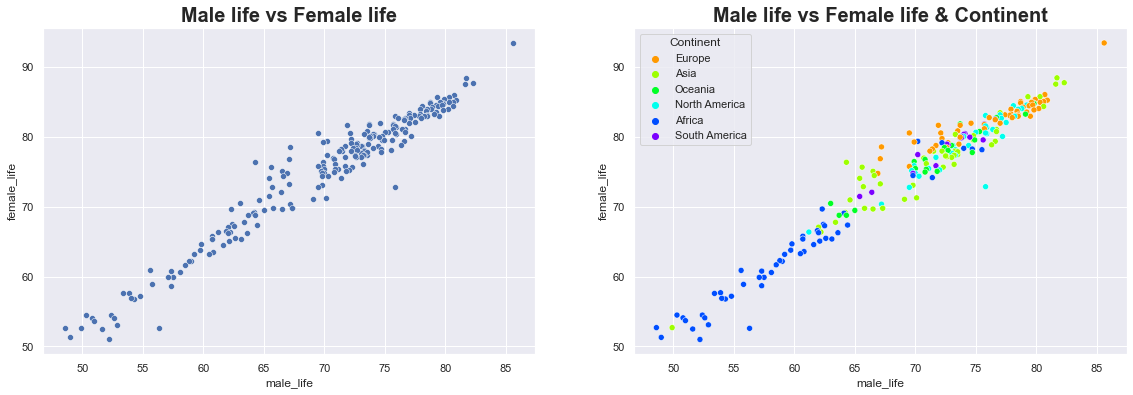

In [111]:
# Male life vs Female life

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='male_life',y='female_life', data=data_copy)
plt.title('Male life vs Female life',fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.scatterplot(x='male_life',y='female_life',hue='Continent', data=data_copy, palette='gist_rainbow')
plt.title('Male life vs Female life & Continent',fontweight="bold", size=20)
plt.subplots_adjust(right=1.2)
plt.show()

Terlihat jelas bahwa kesempatan hidup untuk perempuan dan laki-laki di benua Afrika sangatlah kecil, namun ditengah-tengah ada Asia, dan yang terbesar ada di benua Eropa.

In [135]:
# Country vs Overall life

overall= data_copy.groupby(['Country']).overal_life.sum().sort_values(ascending=False)
overall=pd.DataFrame(overall)
overall1=overall.head()
overall2=overall.tail()
display(overall1.head())  
print('*'*50)
display(overall2.tail())

,overal_life
Country,
Monaco,89.5
Japan,85.0
Singapore,85.0
Macau; China,84.5
San Marino,83.3


**************************************************


,overal_life
Country,
Gabon,52.1
Swaziland,51.6
Afghanistan,51.3
Guinea-Bissau,50.6
Chad,50.2


Sungguh mengejutkan jika diranking untuk overall life justru negara di benua Asia yang paling tinggi nilainya, namun tetap pada negara-negara di benua afrika yang memiliki nilai overall life yang sangat kecil.

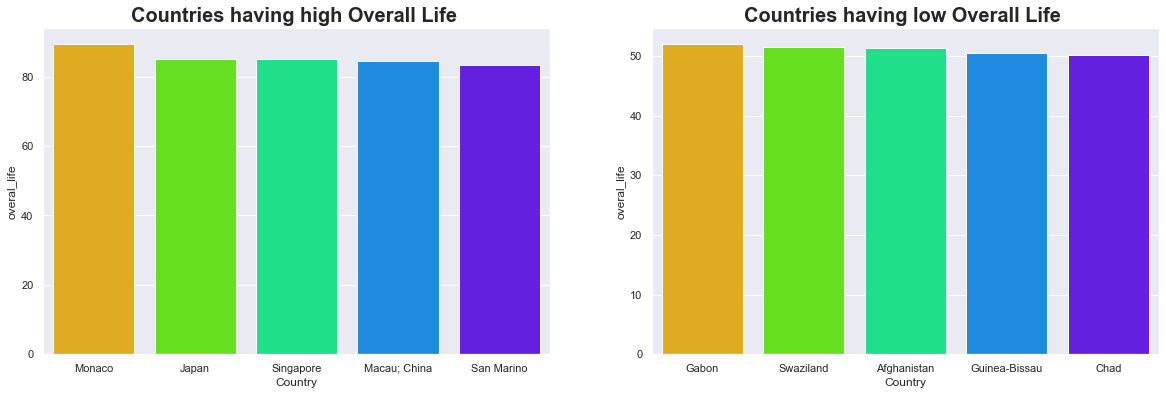

In [136]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(overall1.index, overall1['overal_life'], palette='gist_rainbow')
plt.title('Countries having high Overall Life ',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.barplot(overall2.index, overall2['overal_life'], palette='gist_rainbow')
plt.title('Countries having low Overall Life ',fontweight="bold", size=20)
plt.show()

- Jika dilihat pada grafik di atas menunjukkan bahwa monaco yang memiliki overall life yang besar.
- Negara Chad dari benua Afrika yang memiliki nilai paling rendah overall life.
- Nilai overall life tertinggi masih dipegang dari negara benua Asia yang terbanyak.
- Nilai overall life terendah masih dipegang dari negara benua Afrika.
- yang artinya negara bagian benua Asia yang memiliki nilai overall life tinggi, aman untuk ditinggalkan di negara tersebut.
- sebaliknya untuk negara bagian benua Afika yang memiliki nilai overall life rendah, belum aman untuk ditinggalkan yang memungkinkan masih banyak kehidupan yang belum layak pada benua atau negara-negara di atas.

In [137]:
# Country vs Female Life

female= data_copy.groupby(['Country']).female_life.sum().sort_values(ascending=False)
female=pd.DataFrame(female)
female1=female.head()
female2=female.tail()
display(female1.head())  
print('*'*50)
display(female2.tail())

,female_life
Country,
Monaco,93.5
Japan,88.5
Singapore,87.8
Macau; China,87.6
San Marino,86.1


**************************************************


,female_life
Country,
Guinea-Bissau,52.7
Botswana,52.6
Gabon,52.5
Chad,51.3
Swaziland,51.0


Tidak jauh berbeda dengan overall life, untuk female life atau kesempatan hidup untuk gender perempuan di benua afrika yang terendah diperoleh negara Swaziland, dan tetap yang teraman untuk kesempatan hidup perempuan di negara Monaco.

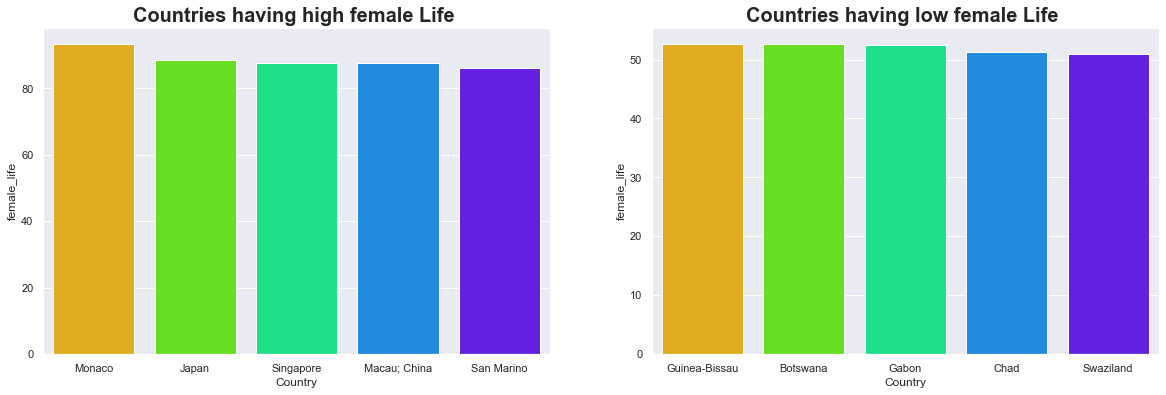

In [138]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(female1.index, female1['female_life'], palette='gist_rainbow')
plt.title('Countries having high female Life ',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.barplot(female2.index, female2['female_life'], palette='gist_rainbow')
plt.title('Countries having low female Life ',fontweight="bold", size=20)
plt.show()

- Jika dilihat pada grafik di atas menunjukkan bahwa monaco yang memiliki female life yang besar.
- Negara Swaziland dari benua Afrika yang memiliki nilai paling rendah female life.
- Nilai female life tertinggi masih dipegang dari negara benua Asia yang terbanyak.
- Nilai female life terendah masih dipegang dari negara benua Afrika.
- yang artinya negara bagian benua Asia yang memiliki nilai female life tinggi, aman untuk perempuan ditinggalkan di negara tersebut.
- sebaliknya untuk negara bagian benua Afika yang memiliki nilai female life rendah, belum aman untuk perempuan ditinggalkan yang memungkinkan masih banyak kehidupan yang belum layak pada benua atau negara-negara di atas.

In [139]:
# Country vs Male Life

male= data_copy.groupby(['Country']).male_life.sum().sort_values(ascending=False)
male=pd.DataFrame(male)
male1=male.head()
male2=male.tail()
display(male1.head())  
print('*'*50)
display(male2.tail())

,male_life
Country,
Monaco,85.6
Singapore,82.3
Japan,81.7
Macau; China,81.6
Iceland,80.9


**************************************************


,male_life
Country,
Zambia,50.8
Somalia,50.3
Afghanistan,49.9
Chad,49.0
Guinea-Bissau,48.6


Tidak jauh berbeda dengan female life, untuk male life atau kesempatan hidup untuk gender laki-laki di benua afrika yang terendah diperoleh negara Guinea-Bissau, dan tetap yang teraman untuk kesempatan hidup laki-laki di negara Monaco.

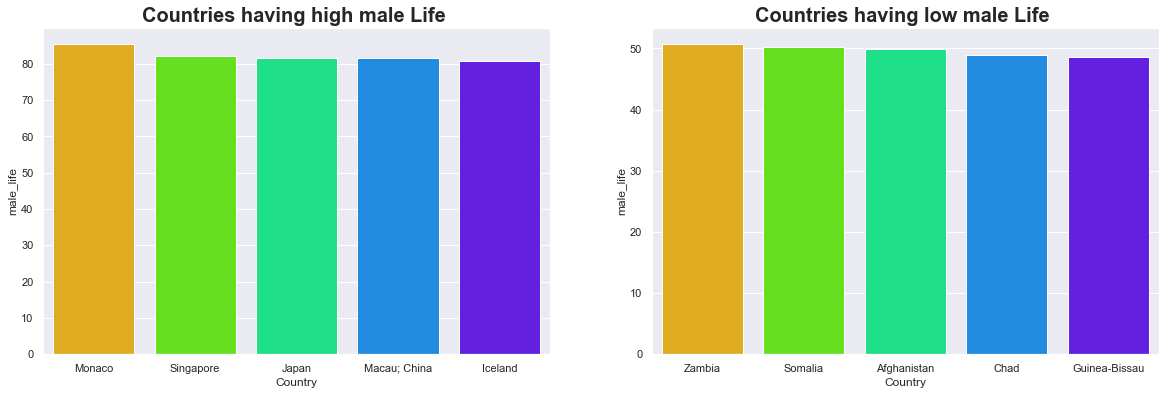

In [140]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(male1.index, male1['male_life'], palette='gist_rainbow')
plt.title('Countries having high male Life ',fontweight="bold", size=20)
plt.subplot(1,2,2)
sns.barplot(male2.index, male2['male_life'], palette='gist_rainbow')
plt.title('Countries having low male Life ',fontweight="bold", size=20)
plt.show()

- Jika dilihat pada grafik di atas menunjukkan berturut-turut bahwa monaco yang memiliki male life yang besar.
- Negara Guinea-Bissau dari benua Afrika yang memiliki nilai paling rendah male life.
- Nilai male life tertinggi masih dipegang dari negara benua Asia yang terbanyak.
- Nilai male life terendah masih dipegang dari negara benua Afrika.
- yang artinya negara bagian benua Asia yang memiliki nilai male life tinggi, aman untuk laki-laki ditinggalkan di negara tersebut.
- sebaliknya untuk negara bagian benua Afika yang memiliki nilai male life rendah, belum aman untuk laki-laki ditinggalkan yang memungkinkan masih banyak kehidupan yang belum layak pada benua atau negara-negara di atas.

# 5 - DATA PREPROCESSING

In [48]:
# Definisikan Random State berdasarkan tanggal pengumpulan tugas
random_state=4

In [49]:
# Get Data for Model Inference

data_inf = data_copy.sample(10, random_state=random_state)
data_inf

,Rank,Country,overal_life,male_life,female_life,Continent
203,204,Sierra Leone,58.2,55.6,60.9,Africa
47,48,Puerto Rico,79.4,75.8,83.1,North America
71,72,French Polynesia,77.2,74.9,79.6,Oceania
208,209,Burkina Faso,55.5,53.4,57.6,Africa
100,101,People's Republic of China,75.5,73.5,77.9,Asia
84,85,Antigua and Barbuda,76.5,74.4,78.8,North America
141,142,Azerbaijan,72.5,69.5,75.8,Europe
196,197,Guinea,60.6,59.0,62.2,Africa
43,44,Wallis and Futuna,79.7,76.7,82.8,Oceania
212,213,Nigeria,53.4,52.4,54.5,Africa


In [50]:
# Remove Inference-Set from Dataset

X = data_copy.drop(data_inf.index)
X

,Rank,Country,overal_life,male_life,female_life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe
...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,Africa
219,220,Swaziland,51.6,52.2,51.0,Africa
220,221,Afghanistan,51.3,49.9,52.7,Asia
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa


In [51]:
# Reset Index

X.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,Rank,Country,overal_life,male_life,female_life,Continent
0,204,Sierra Leone,58.2,55.6,60.9,Africa
1,48,Puerto Rico,79.4,75.8,83.1,North America
2,72,French Polynesia,77.2,74.9,79.6,Oceania
3,209,Burkina Faso,55.5,53.4,57.6,Africa
4,101,People's Republic of China,75.5,73.5,77.9,Asia
5,85,Antigua and Barbuda,76.5,74.4,78.8,North America
6,142,Azerbaijan,72.5,69.5,75.8,Europe
7,197,Guinea,60.6,59.0,62.2,Africa
8,44,Wallis and Futuna,79.7,76.7,82.8,Oceania
9,213,Nigeria,53.4,52.4,54.5,Africa


In [52]:
# backup the train set that we are gonna perform EDA on
X_ori = X.copy()

## Handling Missing Value

In [53]:
# Check Missing Values

X.isnull().sum()

Rank           0
Country        0
overal_life    0
male_life      0
female_life    0
Continent      0
dtype: int64

In [54]:
# Check Missing Values as Percentage to Total Data

X.isnull().mean()

Rank           0.0
Country        0.0
overal_life    0.0
male_life      0.0
female_life    0.0
Continent      0.0
dtype: float64

Tidak terdapat missing value pada dataset ini

## Split between Numerical Columns and Categorical Columns

Pertama-tama mencari tau kolom mana yang berjenis numerikal dan kategorik.


In [55]:
# Paramater Categorization

numerical_col = X.select_dtypes(include=np.number).columns.tolist()
categorical_col = X.select_dtypes(include=['object']).columns.tolist()

In [56]:
# Show each categories

print('Numerical Parameters')
print(numerical_col)
print()
print('Categorical Parameters')
print(categorical_col)

Numerical Parameters
['Rank', 'overal_life', 'male_life', 'female_life']

Categorical Parameters
['Country', 'Continent']


nyatanya ada 3 kolom categorical yaitu Rank, Country, dan Continent, serta hanya ada 3 kolom numerikal yaitu 'overal_life', 'male_life', dan 'female_life'. Pada unsupervised ini lebih baik menggunakan kolom numerik agar hasilnya maksimal.

## Feature Selection

<AxesSubplot:>

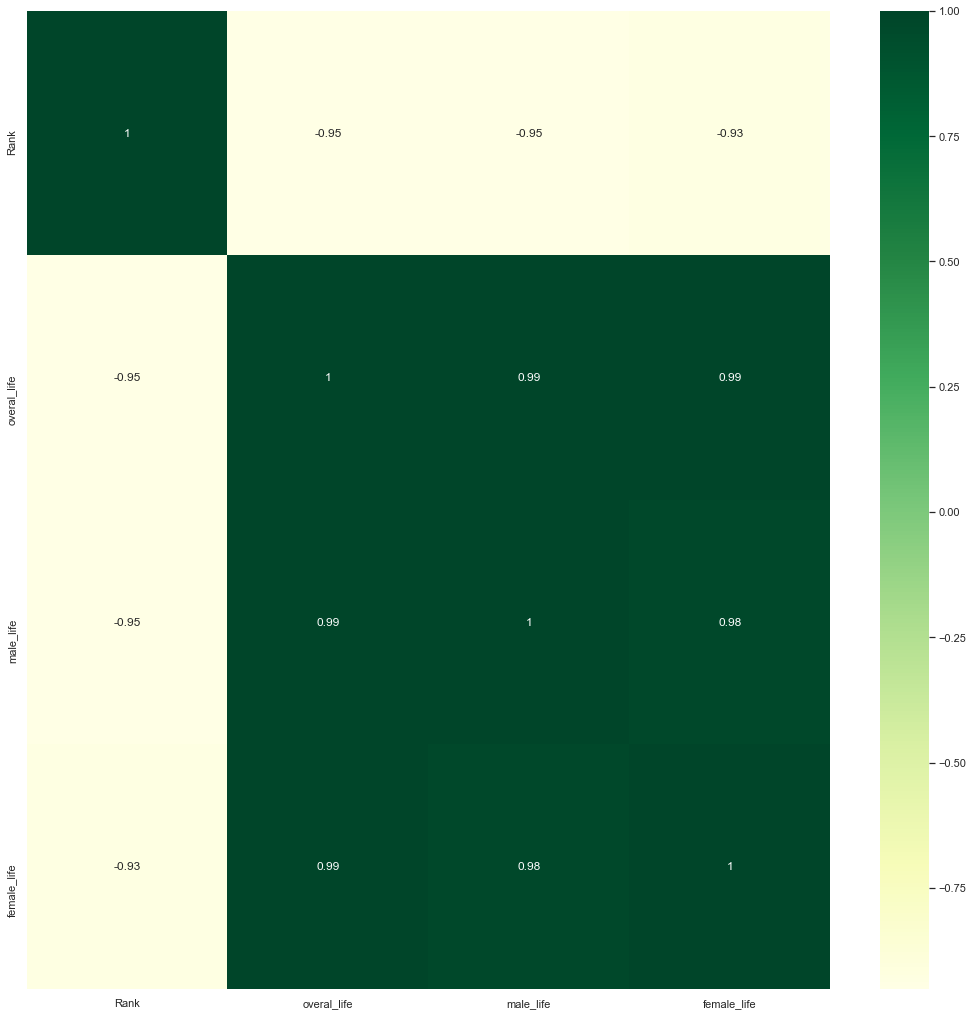

In [57]:
sns.set(rc={'figure.figsize':(18,18)})
sns.heatmap(data=X.corr(), annot=True, cmap='YlGn')

dalam kolom numerikal ketiganya sangat berkorelasi besar satu sama lain.

In [58]:
# Drop kolom kategorikal

X.drop(['Rank', 'Country', 'Continent'], axis=1, inplace=True)

In [59]:
X.head()

,overal_life,male_life,female_life
0,89.5,85.6,93.5
1,85.0,81.7,88.5
2,85.0,82.3,87.8
3,84.5,81.6,87.6
4,83.3,80.7,86.1


Kolom sudah berubah hanya kolom numerikal.

## Handling Outliers

### Identify variable distribution

Pada sub bab kali ini akan handling outliers hanya untuk kolom berjenis numerikal.

Selanjutnya menjadi tahu distribusi dari masing-masing kolom numerik, karena penting untuk membagi jenis skewednya yang mana keterangannya sebagai berikut:
- Jika skewness di antara -0.5 dan 0.5, data termasuk *fairly symmetrical*.
- Jika skewness di antara -1 dan -0.5 atau di antara 0.5 dan 1, data termasuk *moderately skewed*.
- Jika skewness di bawah dari -1 atau di atas dari 1, maka data termasuk *highly skewed*.

In [60]:
# Fungsi untuk membuat histogram dan boxplot
# Fungsi ini diambil dari dataframe (data) dan variable yang akan diambil nantinya.
# Hanya kolom numerik yang akan dihandling outliernya kali ini

def diagnostic_plots(X, variable):
    plt.figure(figsize=(16,4))

    # Histogram
    plt.subplot(1,2,1)
    sns.histplot(X[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(y=X[variable])
    plt.title('Boxplot')

    plt.show()

Distribusi overal_life


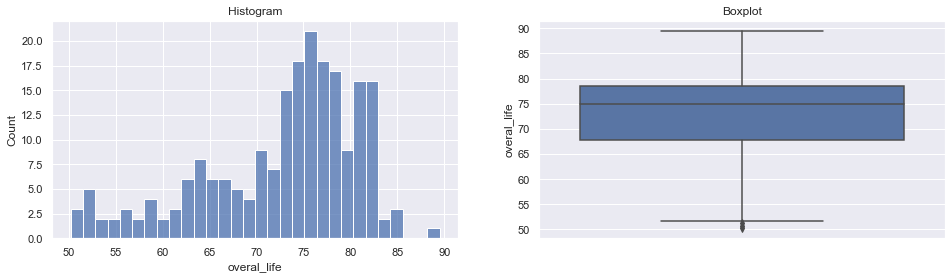

Skewness Value :  -0.9152552026814608

Distribusi male_life


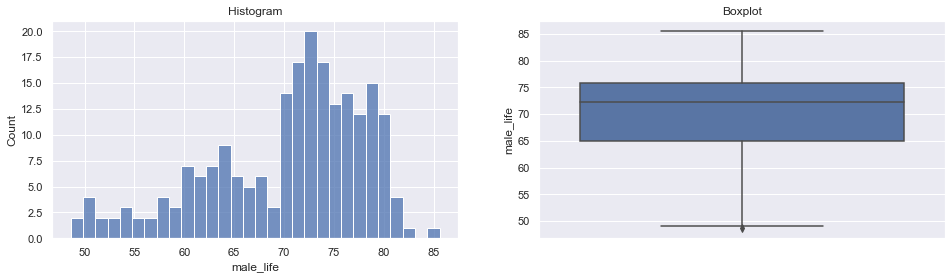

Skewness Value :  -0.7978148891154055

Distribusi female_life


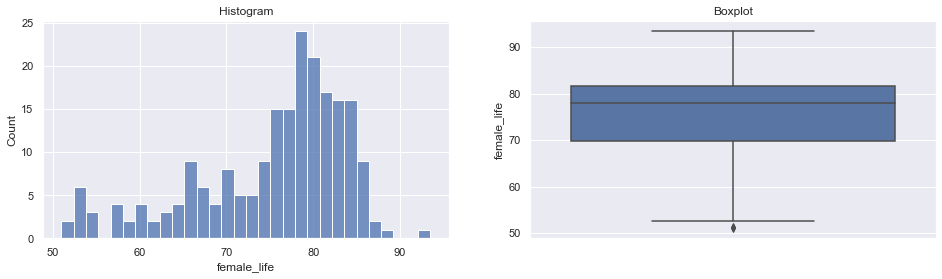

Skewness Value :  -0.9911430654163106



In [61]:
# Menunjukkan distribusi dengan graik histogram Kolom numerik 

for columns in X.columns:
    print(f'Distribusi {columns}')
    diagnostic_plots(X, columns)
    print('Skewness Value : ', X[columns].skew())
    print('')


- Kolom overal_life mendapatkan skewnes value -0.9152552026814608 yang artinya data moderately skewed atau datanya tidak terdistribusi dengan normal.
- Kolom male_life mendapatkan skewnes value -0.7978148891154055 yang artinya data moderately skewed atau datanya tidak terdistribusi dengan normal.
- Kolom female_life mendapatkan skewnes value -0.9911430654163106 yang artinya data moderately skewed atau datanya tidak terdistribusi dengan normal.

### Censoring

In [62]:
X.columns

Index(['overal_life', 'male_life', 'female_life'], dtype='object')

In [63]:
# Create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['overal_life', 'male_life', 'female_life'])

windsoriser.fit(X)

X_cap = windsoriser.transform(X)

In [64]:
def check_dist(data) :
    dist = data.skew(numeric_only=True)
    normal_dist = []
    skew_dist = []

    for i in range(len(dist)):
        if dist.values[i] < -0.5:
            skew_dist.append(dist.index[i])
        elif dist.values[i] > 0.5:
            skew_dist.append(dist.index[i])
        else:
            normal_dist.append(dist.index[i])

    print('skew_dist :', skew_dist)
    print("=========="*15)
    # normal_dist
    print('normal_dist :',normal_dist)

In [65]:
# Check distribusi after winsorizer
check_dist(X_cap)

skew_dist : ['overal_life', 'male_life', 'female_life']
normal_dist : []


Data yang sudah di capping masih tergolog skew distribution maka akan dilakukan scaling ke dalam MinMaxScaler.

In [72]:
# categorizing features
skewed_cols = [
    'overal_life', 'male_life', 'female_life']
norm_cols = []

## Create Pipeline Scaler


In [66]:
# create pipeline for min max scaler
min_max_pipe = Pipeline([
    ('MinMaxScaler', MinMaxScaler())
])

Pendifinisian scaler StandardScaler dan MinMaxScaler.

## Create Column Transformer

In [73]:
# create column transformer object using standard scaler and min max scaler
ct_pipe = ColumnTransformer([
    ('skew', min_max_pipe, skewed_cols)
])


Subtitute kolom skew ke dalam pipeline ColumnTransformer.

## Check for Multicollinearity

In [74]:
# create a DataFrame to store the variance inflation factor
vif_data = pd.DataFrame(X.columns, columns=['feats'])

vif_data['vif'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data

,feats,vif
0,overal_life,60418.78
1,male_life,17156.15
2,female_life,16059.60


In [75]:
# transform numerical features using column transformer
X_scaled = ct_pipe.fit_transform(X_cap)

# print X_scaled shape
print(f'X_scaled shape: {X_scaled.shape}')

X_scaled shape: (213, 3)


## Dimensionality Reduction

### PCA

In [76]:
# declare PCA object using the whole features
pca = PCA(random_state=random_state)
pca.fit(X_scaled)

# calculate cumulative sum of the explained variance ratio
cumsum = np.cumsum(pca.explained_variance_ratio_)

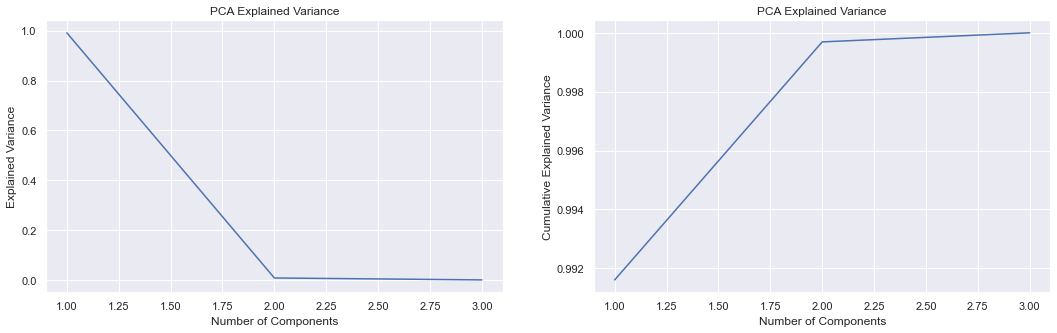

In [77]:
# plot the explained variance ratio
plt.figure(figsize=(18, 5))

# plot the explained variance ratio
plt.subplot(1, 2, 1)
plt.plot(range(1, X_scaled.shape[1]+1), pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('PCA Explained Variance')

# plot the cumulative sum of the explained variance ratio
plt.subplot(1, 2, 2)
plt.plot(range(1, X_scaled.shape[1]+1), cumsum)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

plt.show()

In [78]:
cumsum

array([0.99160353, 0.99969103, 1.        ])

Ternyata dari EVR cukup membawa 2 kolom saja untuk diclustering mencakup 99.9% data informasi yang digunakan.

In [83]:
# declare PCA object with the preserve ratio of 0.8
pca = PCA(n_components=2, random_state=random_state)

# perform dimensionality reduction
X_reduced = pca.fit_transform(X_scaled)

In [84]:
# display the number of components after dimensionality reduction
pca.n_components_

2

Ya, jadilah hasil reduksi dimensi menggunakan PCA yang mana kita bisa mengurangi 1 fitur yang berawal dari 3 fitur menjadi 2 fitur saja dengan dasar dari grafik EVR di atas.

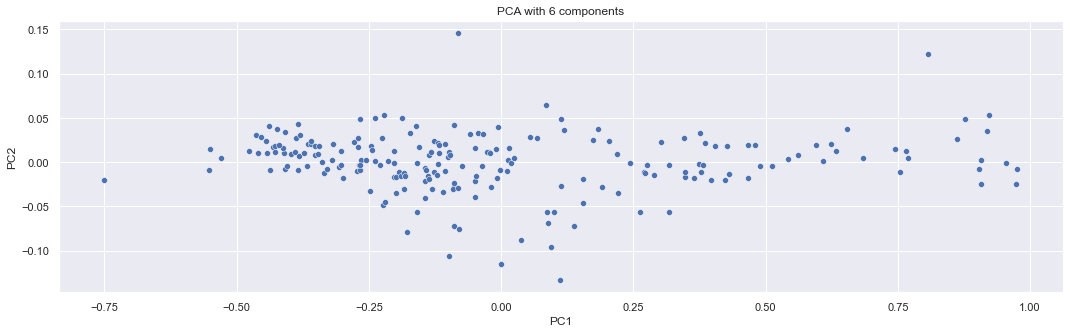

In [87]:
# plot pca with 2 components
pca_2d = PCA(n_components=2, random_state=random_state)
X_2d  = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with 6 components')
plt.show()

# 6 - MODEL DEFINITION
Models: The Clustering Algorithms I'm going to test K-Means

In [88]:
# declare default kmeans object
kmeans = KMeans(n_clusters=5, random_state=random_state)

# 7 - MODEL TRAINING

In [89]:

# fit all models using the reduced data set after dimensionality reduction
kmeans.fit(X_reduced)

KMeans(n_clusters=5, random_state=4)

# 8 - MODEL EVALUATION

In [90]:
# create a list for each kmeans cluster
kmeans_per_k = [KMeans(n_clusters=k, random_state=random_state).fit(X_reduced)
                for k in range(1, 15)]

Default k di sini interval antara 1 - 15 untuk mencari cluster terbaik berdasarkan parameter Inertia dan Silhouette Scores.

### Inertia

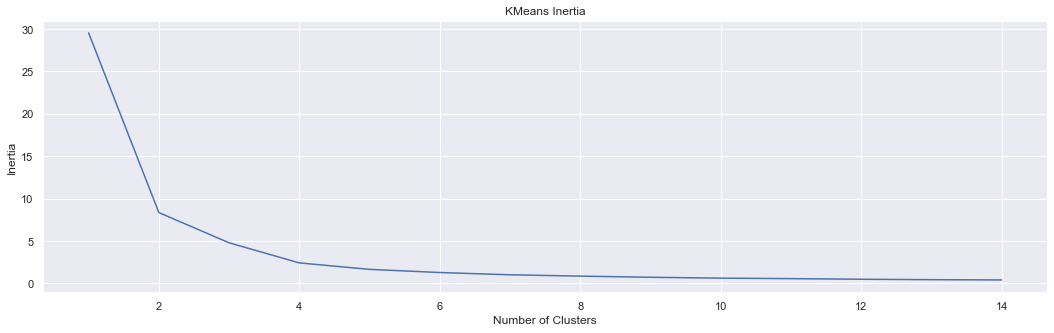

In [91]:
# plot inertia for each kmeans cluster
inertia = [model.inertia_ for model in kmeans_per_k]
plt.figure(figsize=(18, 5))
plt.plot(range(1, 15), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('KMeans Inertia')
plt.show()

Dari hasil inertia di atas sebenarnya grafik sudah landai saat 2 cluster, namun masih belum membawa informasi yang cukup jika hanya 2 cluster, maka akan cukup informasi jika cluster dijadikan menjadi 4 cluster.

### Silhouette Scores

In [92]:
# store silhouette scores for each kmeans cluster
silh_score = [silhouette_score(X_reduced, model.labels_)
for model in kmeans_per_k[1:]]

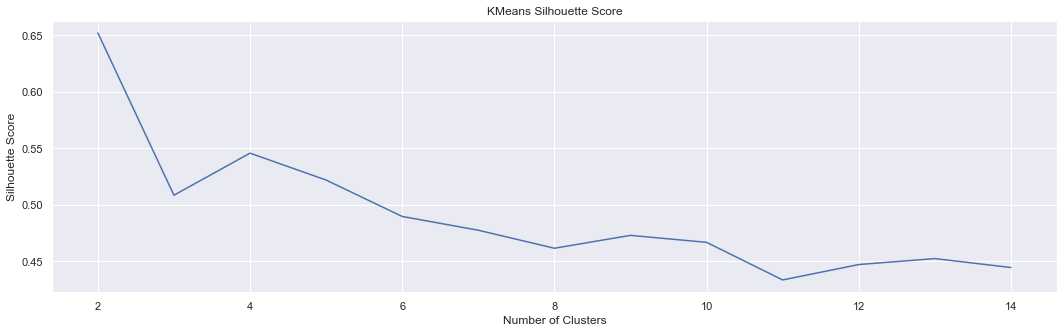

In [94]:
# plot silhouette scores for each kmeans cluster
plt.figure(figsize = (18,5))
plt.plot(range(2, 15), silh_score)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('KMeans Silhouette Score')
plt.show()

Namun pada parameter silhouette score bahwa baiknya dilakukan dengan 2 fitur.

In [95]:
def plot_silhouette(range_n_clusters,X):

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = mpl.cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = mpl.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.6518816954241297
For n_clusters = 3 The average silhouette_score is : 0.5083059712167691
For n_clusters = 4 The average silhouette_score is : 0.5455033925849859
For n_clusters = 5 The average silhouette_score is : 0.5216991133724301
For n_clusters = 6 The average silhouette_score is : 0.48797078910760355
For n_clusters = 7 The average silhouette_score is : 0.48478714237397197
For n_clusters = 8 The average silhouette_score is : 0.46014972025058376
For n_clusters = 9 The average silhouette_score is : 0.47227305730648383
For n_clusters = 10 The average silhouette_score is : 0.45274197067375344
For n_clusters = 11 The average silhouette_score is : 0.44897355906060143
For n_clusters = 12 The average silhouette_score is : 0.4475319730681662
For n_clusters = 13 The average silhouette_score is : 0.42852774679783956
For n_clusters = 14 The average silhouette_score is : 0.44249490691416193


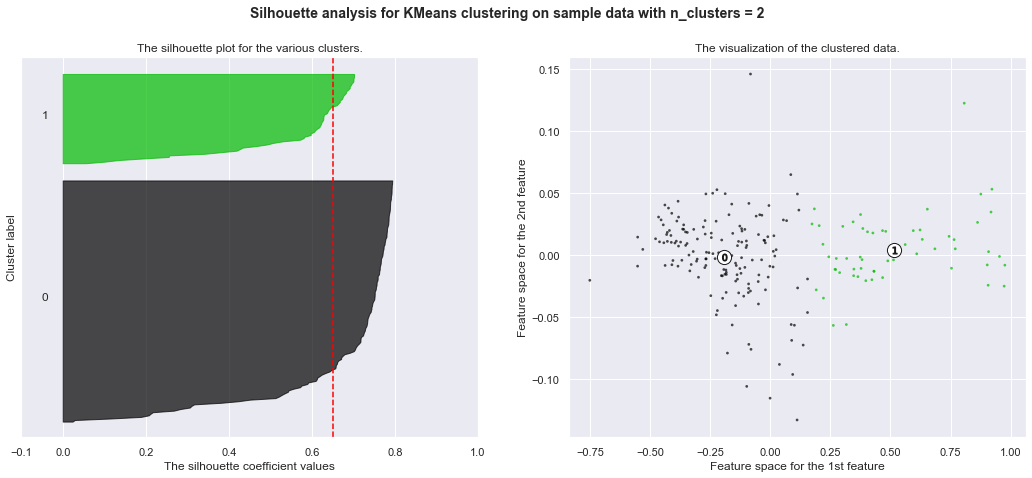

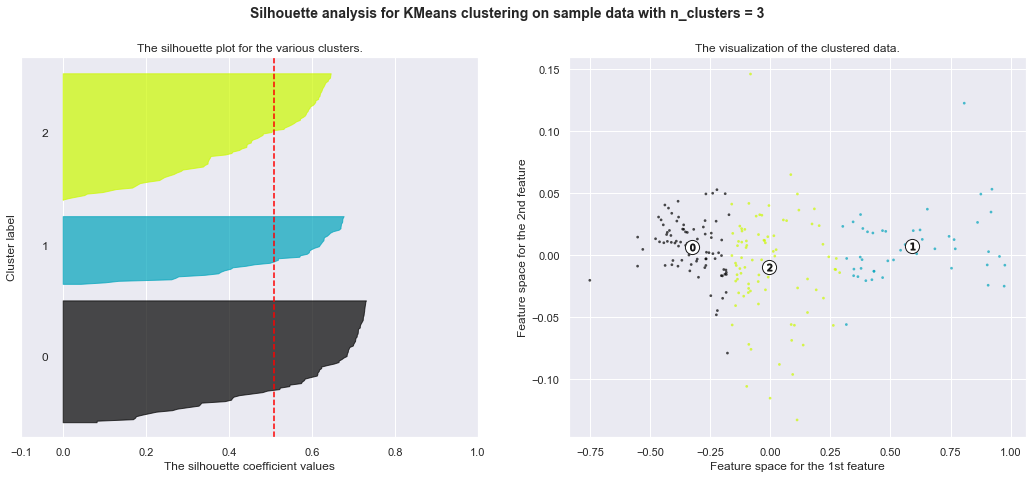

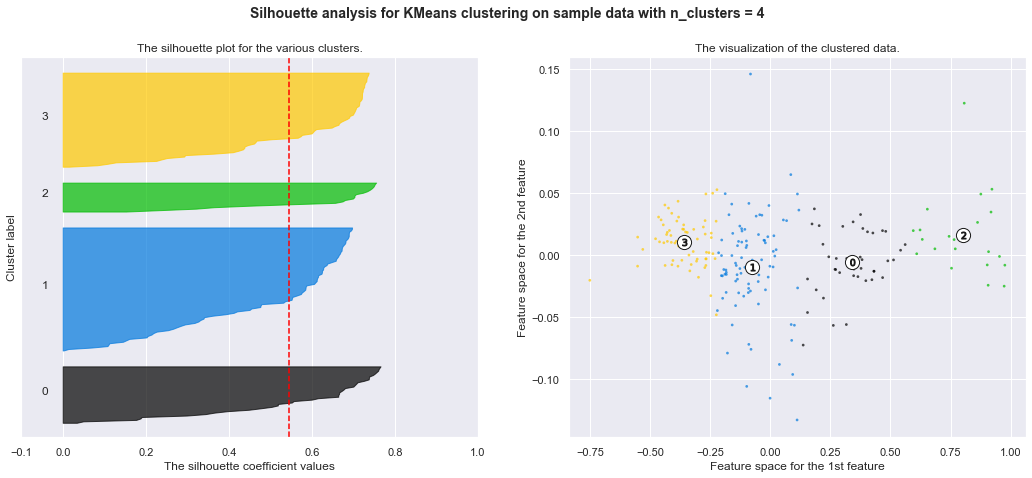

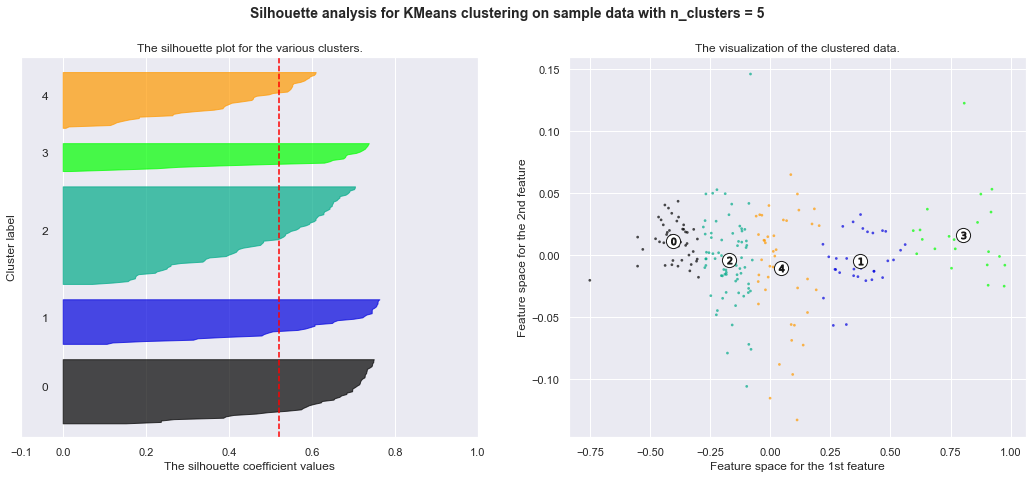

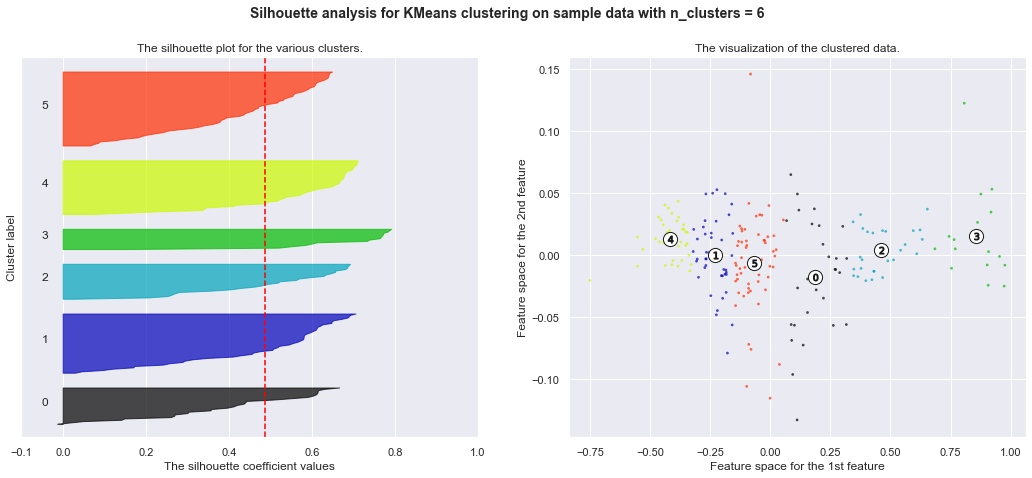

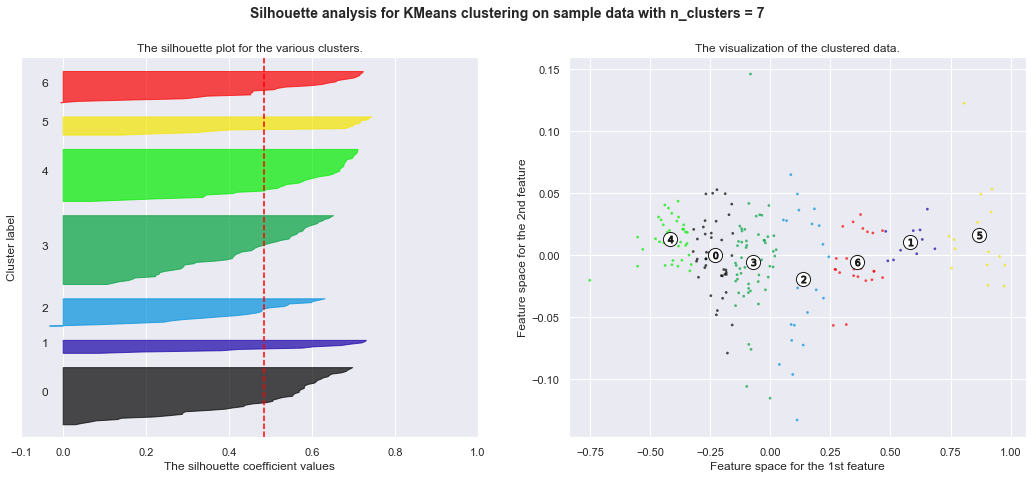

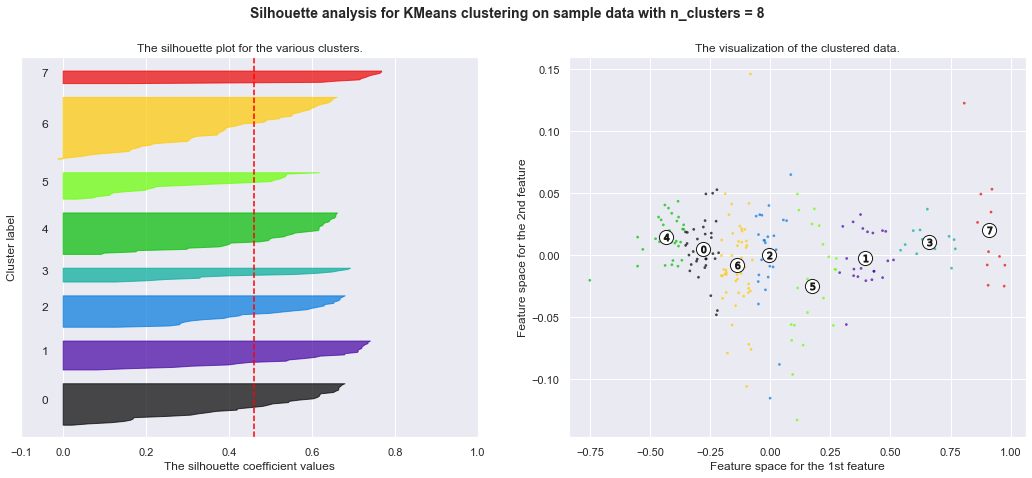

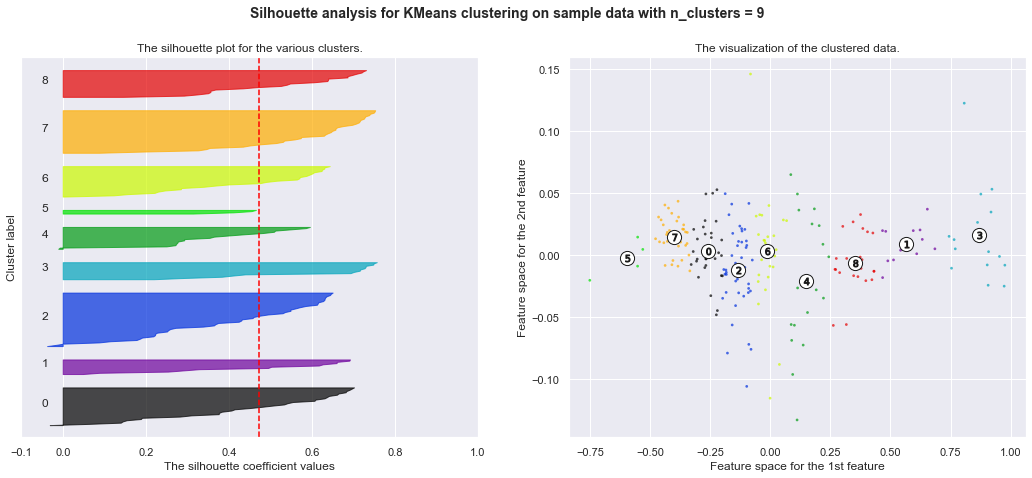

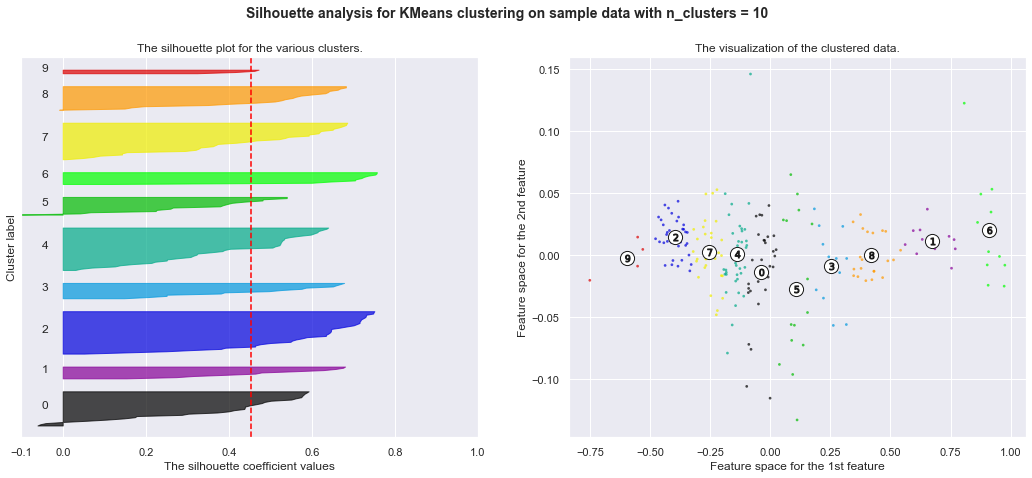

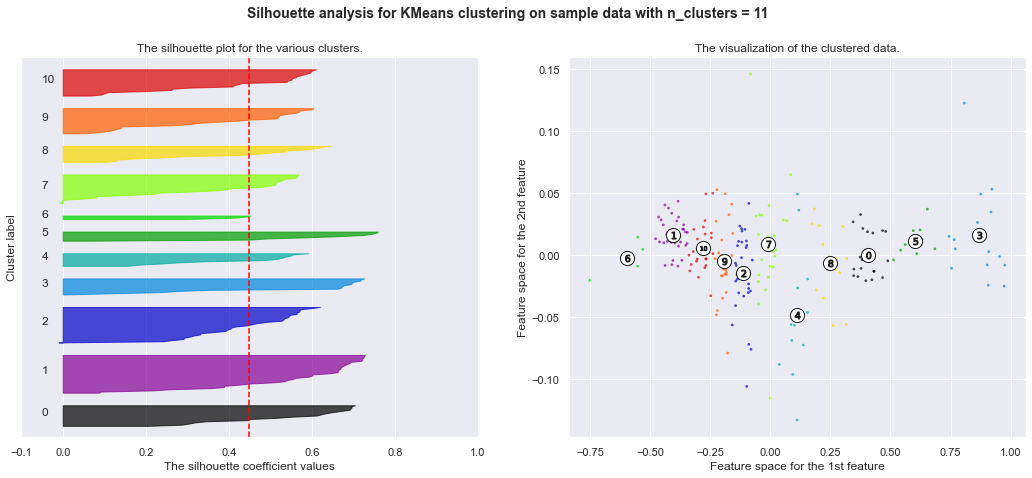

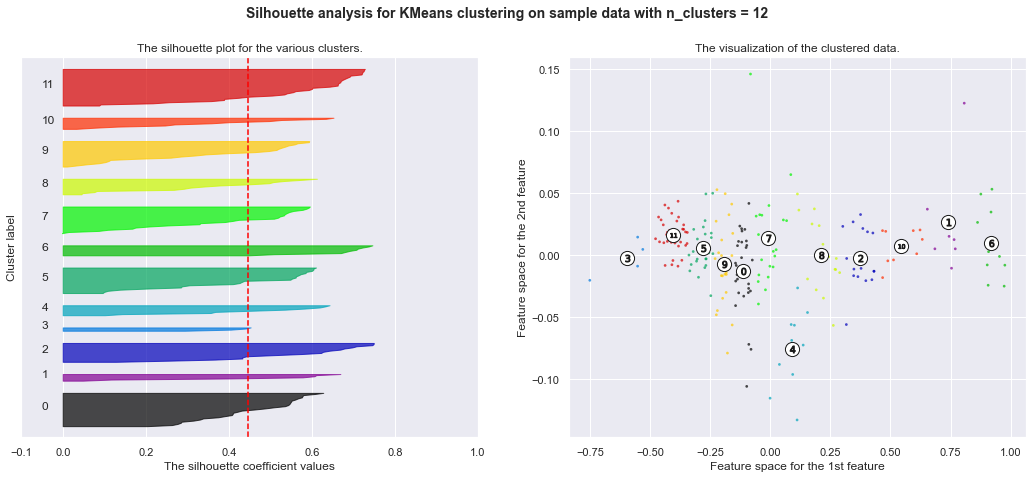

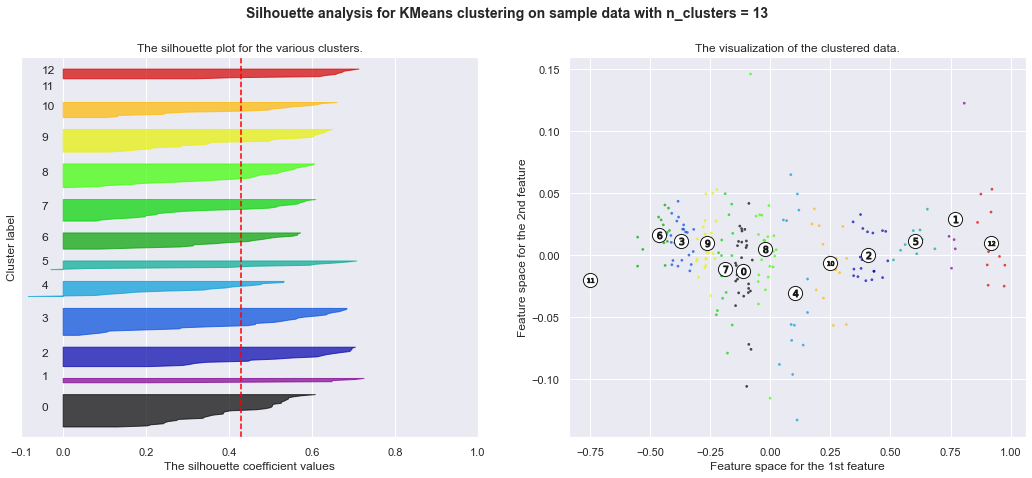

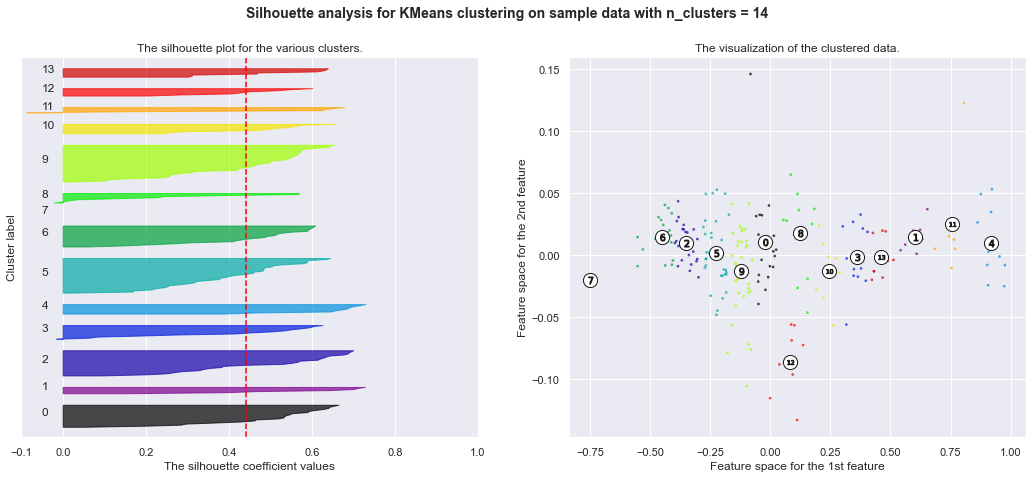

In [96]:
# plot silhouette diagram for each kmeans cluster
plot_silhouette(range_n_clusters = range(2, 15), X=X_reduced)

Berdasarkan silhouete score, semua cluster melewati garis threshold, namun di antara k = 2 dan k = 3 adalah patokannya, k = 3 lebih baik clusteringnya dibanding k = 2.

### Using the best number of clusters

In [97]:
# declare kmeans object with the best number of clusters
kmeans = KMeans(n_clusters=3, random_state=random_state)

# fit the kmeans model
kmeans.fit(X_reduced)

KMeans(n_clusters=3, random_state=4)

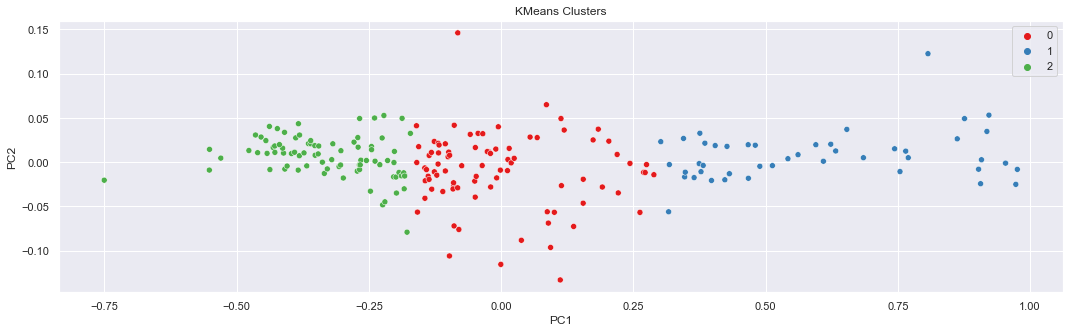

In [98]:
# plotting kmeans clusters in 2D
plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=kmeans.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters')
plt.show()

Clustering k = 3 sangat baik, tidak ada tumpang tindih satu sama lainnya.

In [99]:
# copy from the train set to store kmeans labels
X_kmeans = X_cap.copy()

# add cluster labels to the dataframe
X_kmeans['cluster'] = kmeans.labels_

# display the clustered dataframe
X_kmeans.head()

,overal_life,male_life,female_life,cluster
0,89.5,85.6,93.5,2
1,85.0,81.7,88.5,2
2,85.0,82.3,87.8,2
3,84.5,81.6,87.6,2
4,83.3,80.7,86.1,2


### EDA on Clustered Set

#### Cluster Distribution

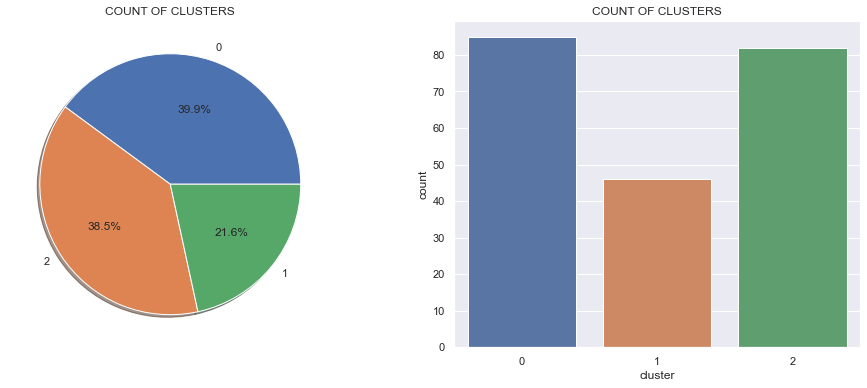

In [100]:
# value counts for each cluster
f,ax=plt.subplots(1,2,figsize=(16,6))
X_kmeans['cluster'].value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[1].set_title('COUNT OF CLUSTERS')
ax[0].set_title('COUNT OF CLUSTERS')
ax[0].set_ylabel('')
sns.countplot('cluster',data=X_kmeans,ax=ax[1])
ax[1].set_title('COUNT OF CLUSTERS')
plt.show()

In [101]:
X_kmeans.cluster.value_counts()

0    85
2    82
1    46
Name: cluster, dtype: int64

Pada cluster 1 berbeda signifikan dengan cluster 0 dan cluster 2.

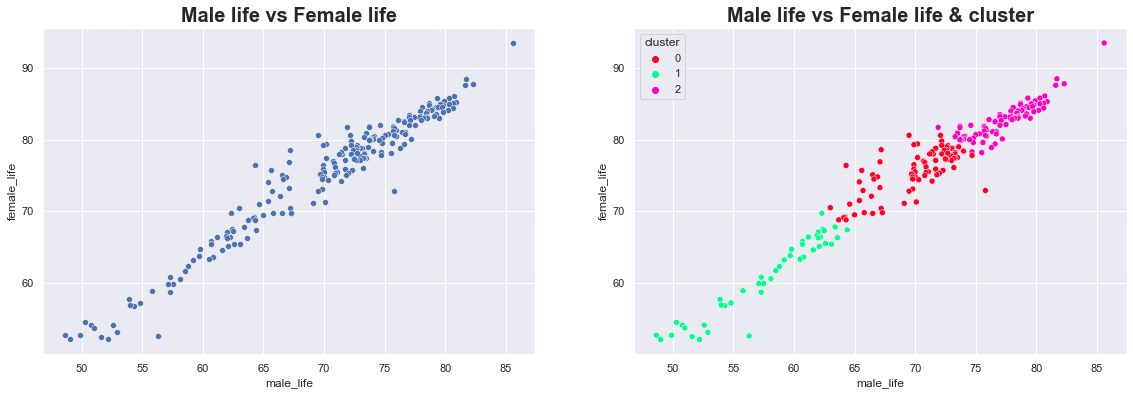

In [141]:
# Male life vs Female life

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='male_life',y='female_life', data=X_kmeans)
plt.title('Male life vs Female life',fontweight="bold", size=20)

plt.subplot(1, 2, 2)
sns.scatterplot(x='male_life',y='female_life',hue='cluster', data=X_kmeans, palette='gist_rainbow')
plt.title('Male life vs Female life & cluster',fontweight="bold", size=20)
plt.subplots_adjust(right=1.2)
plt.show()

Jika diclustering dibagi menjadi 3 cluster:
- Cluster 1 merupakan cluster low untuk nilai male_life dan female life yang artinya kehidupan gender perempuan dan laki-laki sangat kecil di cluster tersebut
- Cluster 0 merupakan cluster medium untuk nilai male_life dan female_life yang artinya kehidupan gender perempuan dan laki-laki berada di tengah-tengah antara cluster 1 dan cluster 2, yang mungkin menjadi parameter threshold untuk kehidupan gender, dan bisa dibilang aman serta juga tidak aman pada cluster 0.
- Cluster 2 merupakan cluster high value male_life dan female_life yang artinya kehidupan gender perempuan dan laki-laki berada paling atas yang paling aman ditempati untuk hidup di cluster 2.

In [145]:
# Cluster vs Overall life

overall= X_kmeans.groupby(['cluster']).overal_life.sum().sort_values(ascending=False)
overall=pd.DataFrame(overall)
overall1=overall.head()
display(overall1.head())  

,overal_life
cluster,
2,6558.00
0,6185.10
1,2735.15


Text(0.5, 1.0, 'Countries having high Overall Life ')

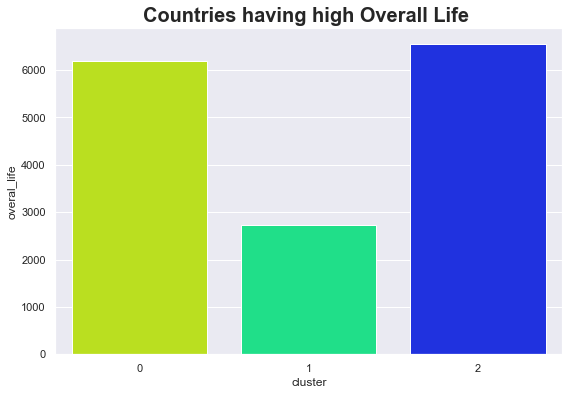

In [144]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(overall1.index, overall1['overal_life'], palette='gist_rainbow')
plt.title('Countries having high Overall Life ',fontweight="bold", size=20)


Terbukti bahwa clustering ini membawa hirarki yang jelas untuk nilai overall life dari grafik di atas menunjukkan:
- Cluster 2 high value overall life 
- Cluster 0 medium value overall life
- Cluster 1 low value overall life

In [152]:
# Cluster vs Female life

female= X_kmeans.groupby(['cluster']).female_life.sum().sort_values(ascending=False)
female=pd.DataFrame(female)
female1=female.head()
display(female1.head())  

,female_life
cluster,
2,6786.2
0,6421.6
1,2810.2


Text(0.5, 1.0, 'Countries having high female Life ')

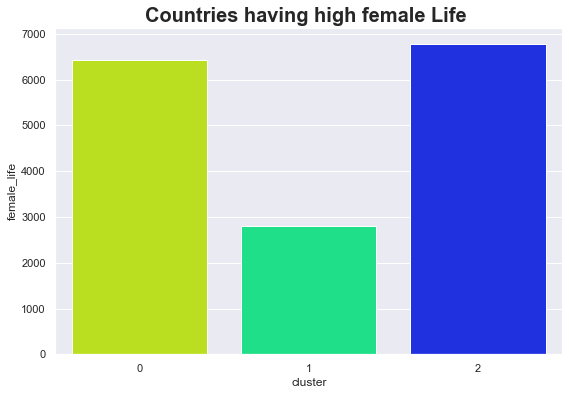

In [153]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(female1.index, female1['female_life'], palette='gist_rainbow')
plt.title('Countries having high female Life ',fontweight="bold", size=20)


Tidak jauh berbeda dengan overall life terbukti bahwa clustering ini membawa hirarki yang jelas untuk nilai female life dari grafik di atas menunjukkan:
- Cluster 2 high value overall life, yang mana cluster 2 sangat aman untuk ditinggalkan oleh perempuan. 
- Cluster 0 medium value overall life, yang mana cluster 0 cukup aman namun masih ditinggalkan oleh perempuan.
- Cluster 1 low value overall life, yang mana cluster 1 tidak aman ditinggalkan oleh perempuan.

In [149]:
# Cluster vs Male life

male= X_kmeans.groupby(['cluster']).male_life.sum().sort_values(ascending=False)
male=pd.DataFrame(male)
male1=male.head()
display(male1.head())  

,male_life
cluster,
2,6340.90
0,5951.20
1,2662.05


Text(0.5, 1.0, 'Countries having high Male Life ')

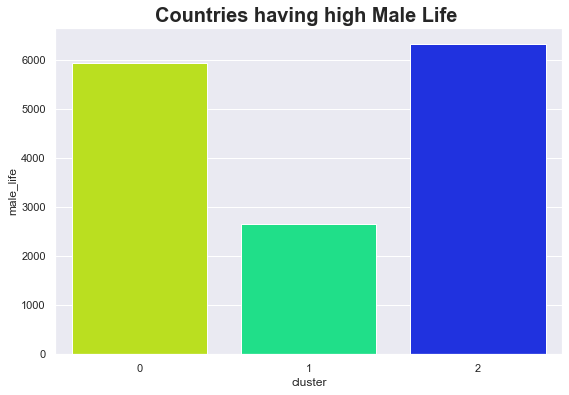

In [150]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
sns.barplot(male1.index, male1['male_life'], palette='gist_rainbow')
plt.title('Countries having high Male Life ',fontweight="bold", size=20)


Tidak jauh berbeda dengan female life terbukti bahwa clustering ini membawa hirarki yang jelas untuk nilai male life dari grafik di atas menunjukkan:
- Cluster 2 high value overall life, yang mana cluster 2 sangat aman untuk ditinggalkan oleh laki-laki. 
- Cluster 0 medium value overall life, yang mana cluster 0 cukup aman namun masih ditinggalkan oleh laki-laki.
- Cluster 1 low value overall life, yang mana cluster 1 tidak aman ditinggalkan oleh laki-laki.

### Create a pipeline

In [102]:
# create a pipeline for kmeans using the best number of clusters
kmeans_pipe = Pipeline([
    ('ct', ct_pipe),
    ('pca', PCA(n_components=2, random_state=random_state)),
    ('kmeans', KMeans(n_clusters=3, random_state=random_state))
])

# fit the pipeline to the data
kmeans_pipe.fit(X_cap)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('skew',
                                                  Pipeline(steps=[('robust_scaler',
                                                                   MinMaxScaler())]),
                                                  ['overal_life', 'male_life',
                                                   'female_life'])])),
                ('pca', PCA(n_components=2, random_state=4)),
                ('kmeans', KMeans(n_clusters=3, random_state=4))])

# 9 - SAVE THE FINAL MODEL

In [103]:
# prepare directory for saving model
model_dir = 'models'
model_name = 'model_kmeans.pkl'

# create directory if it does not exist
Path(model_dir).mkdir(parents=True, exist_ok=True)

# save model
joblib.dump(kmeans_pipe, Path(model_dir, model_name))

['models\\model_kmeans.pkl']

# 10 - MODEL INFERENCE

## Load The Model

In [104]:
# model location
model_dir = 'models'
model_name = 'model_kmeans.pkl'
model_path = Path(model_dir, model_name)

# load model
kmeans_model = joblib.load(model_path)

In [105]:
# display inference set
data_inf.head()

,Rank,Country,overal_life,male_life,female_life,Continent
0,204,Sierra Leone,58.2,55.6,60.9,Africa
1,48,Puerto Rico,79.4,75.8,83.1,North America
2,72,French Polynesia,77.2,74.9,79.6,Oceania
3,209,Burkina Faso,55.5,53.4,57.6,Africa
4,101,People's Republic of China,75.5,73.5,77.9,Asia


## Inferencing

In [106]:
# predict inference set using the final model
inf_cluster = kmeans_model.fit_predict(data_inf)

In [107]:
# create dataframe with predictions
data_inf['cluster'] = inf_cluster

# display inference set
data_inf

,Rank,Country,overal_life,male_life,female_life,Continent,cluster
0,204,Sierra Leone,58.2,55.6,60.9,Africa,0
1,48,Puerto Rico,79.4,75.8,83.1,North America,1
2,72,French Polynesia,77.2,74.9,79.6,Oceania,1
3,209,Burkina Faso,55.5,53.4,57.6,Africa,2
4,101,People's Republic of China,75.5,73.5,77.9,Asia,1
5,85,Antigua and Barbuda,76.5,74.4,78.8,North America,1
6,142,Azerbaijan,72.5,69.5,75.8,Europe,1
7,197,Guinea,60.6,59.0,62.2,Africa,0
8,44,Wallis and Futuna,79.7,76.7,82.8,Oceania,1
9,213,Nigeria,53.4,52.4,54.5,Africa,2


Model sukses memprediksi data inference.

# 11 - CONCLUSION

## On EDA
- Pada pembagian scatterplot terhadap hue = Continent menunjukkan dari X = male_life, dan Y = female_life. Bahwa Benua Eropa yang memiliki kesempatan hidup paling tinggi dibanding benua lainnya, yang mana dibawah eropa ada benua North Amerika, lalu di tengah-tengah ada Benua Asia, dan yang paling bawah ada Benua Afrika.
- Namun jika di ranking menunjukan dan bahkan berturut-turut baik dari nilai overall life, female life, dan male life. Menunjukkan bahwa negara di Benua Asia yang terbanyak, namun yang memiliki nilai tertinggi yaitu nomor 1 adalah Monaco.
- Tetap konsisten bahwa benua Afrika yang ranking paling rendah dalam nilai overall life, female life, dan male life. Menunjukkan bahwa negara di benua Afrika sangat tidak aman dalam segi kehidupannya. 

## On Modeling
- Analisis kali ini menggunakan model algoritma unsupervised learning yaitu KMeans
- dengan membawa informasi dengan mereduksi menjadi 2 kolom yang dibawa setelah di PCA
- lalu menggunakan 3 cluster setelah melihat beberapa parameter seperti inertia dan silhouette score
- Dan clustering cukup baik terhadap 3 cluster.

## Future Improvement
- Dari model KMeans cukup baik untuk clusteringnya, namun masih cukup tumpang tindih.
- Perlu dilakukan dengna model lainnya.
- Dataset yang kecil mungkin tidak perlu melakukan PCA.


## Problems

Buatlah model machine learning Unsupervised Learning dengan menggunakan KMeans untuk mendeteksi kelompok negara dan jawab pertanyaan dibawah ini sebagai acuan analisa/cerita :

    1. Pada bagian eksplorasi data, apa insight menarik yang bisa kamu ceritakan ?
    2. Berapa cluster yang berhasil kamu peroleh dari dataset tersebut ? Apakah sudah optimal ? Visualisasikan hasil clustering yang  kamu peroleh dengan plot 2 dimensi dimana 2 dimensi tersebut merupakan dimensi yang diperoleh dari hasil reduksi dimensi.
    3. Bagaimana karakteristik dari masing-masing cluster ? Bisakah kamu visualisasikan dan ceritakan ?
    4. Apa insight menarik yang kamu peroleh dari jawaban/analisa nomor 3 ?
    5. Dibandingkan dengan EDA, apakah ada kesamaan dari hasil clustering yang kamu peroleh ? Ceritakan analisamu !


## Jawaban

1. Mengetahui kesempatan hidup atau tinggal di negara-negara yang tercantum dan tahu bahwa Benua-benua mana saja yang terbaik untuk ditinggalkan oleh manusia.
2. Saya memutuskan memakai 3 cluster berdasarkan parameter inertia dan silhoette score yang sangat baik menunjukkan 3 cluster
3. Dengan menggunakan 3 cluster bahwa menunjukkan hirarki yang mana cluster 2 merupakan high, cluster 0 medium, dan cluster 1 low dalam segi niali overall life, female life, dan male life.
4. dalam Cluster 2 high menunjukkan di dalamnya ada beberapa negara di Benua Eropa, Benua Asia dan Benua North Amerika, Cluster 0 medium menunjukkan di dalamnya ada beberapa negara Benua Asia, Benua South Amerika dan Benua Oceania, serta cluster 1 low value menunjukkan di dalamnya kebanyakan diisi oleh negara-negara di benua Afrika.
5. Ada kesamaan dalam segi clustering yang menunjukkan benua-benua yang ada di dalamnya seperti yang sudah dijelaskan pada nomor 4.

For n_clusters = 2 The average silhouette_score is : 0.6518816954241297
For n_clusters = 3 The average silhouette_score is : 0.5083059712167691


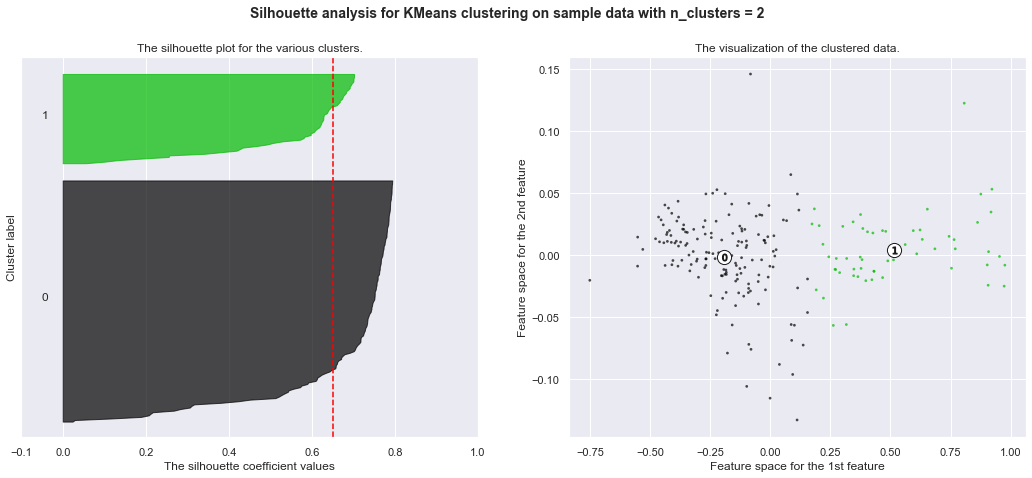

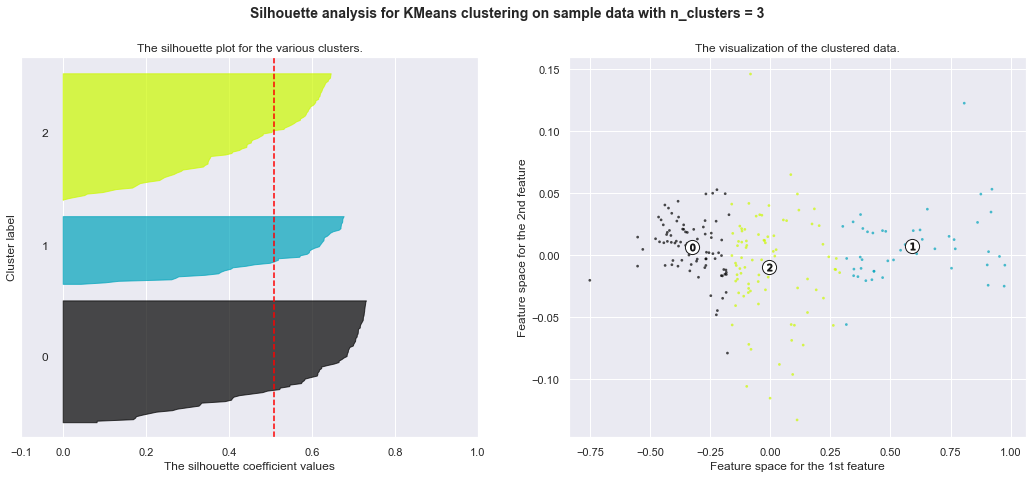

In [156]:
# Menjawab soal nomor 3
# plot silhouette diagram for each kmeans cluster
plot_silhouette(range_n_clusters = range(2, 4), X=X_reduced)